In [40]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Import the dataframe
mainDf = pd.read_csv("tabela_producao_oleo.csv", low_memory=False)
print(mainDf.head())

    Estado    Bacia        NP_ANP           NP_Operador      Campo   Operador  \
0  Sergipe  Sergipe   7-GA-7D-SES  7GA  0007D SES        GUARICEMA  Petrobras   
1  Sergipe  Sergipe  7-GA-66D-SES  7GA66DSES             GUARICEMA  Petrobras   
2  Sergipe  Sergipe  7-GA-35D-SES  7GA  0035D SES        GUARICEMA  Petrobras   
3  Sergipe  Sergipe   7-GA-30-SES  7GA  0030  SES        GUARICEMA  Petrobras   
4  Sergipe  Sergipe  7-GA-58D-SES  7GA  0058D SES        GUARICEMA  Petrobras   

  Número do Contrato  Período  Óleo (bbl/dia)  Condensado (bbl/dia)  \
0    480000038399796  2005/01         76.5937                   0.0   
1    480000038399796  2005/01         71.3589                   0.0   
2    480000038399796  2005/01          0.0000                   0.0   
3    480000038399796  2005/01          0.0000                   0.0   
4    480000038399796  2005/01        423.0607                   0.0   

   Petróleo (bbl/dia)  GN_Associado  GN_Não associado  GN_Gás Total  \
0             7

In [43]:
# General information about data
print(mainDf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109401 entries, 0 to 2109400
Data columns (total 19 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Estado                          object 
 1   Bacia                           object 
 2   NP_ANP                          object 
 3   NP_Operador                     object 
 4   Campo                           object 
 5   Operador                        object 
 6   Número do Contrato              object 
 7   Período                         object 
 8   Óleo (bbl/dia)                  float64
 9   Condensado (bbl/dia)            float64
 10  Petróleo (bbl/dia)              float64
 11  GN_Associado                    float64
 12  GN_Não associado                float64
 13  GN_Gás Total                    float64
 14  Volume Gás                      float64
 15  Água (bbl/dia)                  float64
 16  Instalação Destino              object 
 17  Tipo Instalação            

In [45]:
print(f"Shape of the Dataframe: {mainDf.shape}")

Shape of the Dataframe: (2109401, 19)


In [46]:
print(mainDf.describe)

<bound method NDFrame.describe of           Estado      Bacia        NP_ANP           NP_Operador      Campo  \
0        Sergipe    Sergipe   7-GA-7D-SES  7GA  0007D SES        GUARICEMA   
1        Sergipe    Sergipe  7-GA-66D-SES  7GA66DSES             GUARICEMA   
2        Sergipe    Sergipe  7-GA-35D-SES  7GA  0035D SES        GUARICEMA   
3        Sergipe    Sergipe   7-GA-30-SES  7GA  0030  SES        GUARICEMA   
4        Sergipe    Sergipe  7-GA-58D-SES  7GA  0058D SES        GUARICEMA   
...          ...        ...           ...                   ...        ...   
2109396    Bahia  Recôncavo    7-BA-73-BA         7BA  0073  BA   BURACICA   
2109397    Bahia  Recôncavo    7-BA-75-BA         7BA  0075  BA   BURACICA   
2109398    Bahia  Recôncavo    7-BA-81-BA         7BA  0081  BA   BURACICA   
2109399    Bahia  Recôncavo    7-BA-92-BA         7BA  0092  BA   BURACICA   
2109400    Bahia  Recôncavo    7-BA-94-BA         7BA  0094  BA   BURACICA   

          Operador Número do 

In [47]:
# Remove Duplicates
mainDf = mainDf.drop_duplicates()

# Group by the data by Period
df = mainDf.groupby("Período", as_index=False).agg({"Óleo (bbl/dia)": "sum"})
df["Período"] = pd.to_datetime(df["Período"])


In [50]:
print(df.dtypes)
print((f"Shape of the Dataframe: {df.shape}"))

Período           datetime64[ns]
Óleo (bbl/dia)           float64
dtype: object
Shape of the Dataframe: (207, 2)


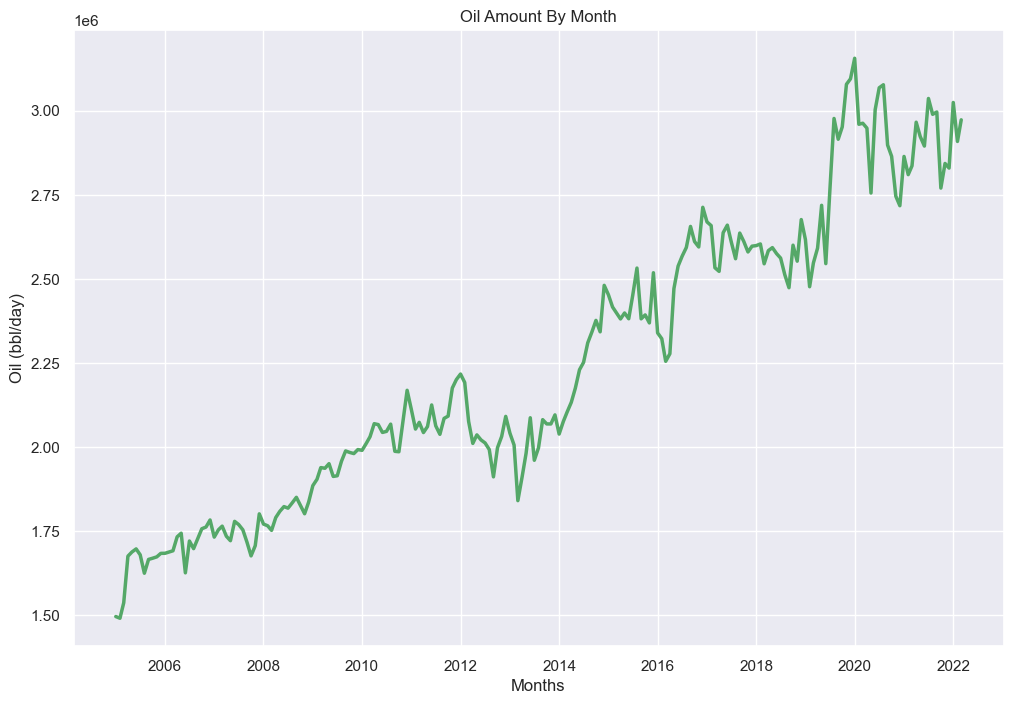

In [51]:
# Visualize data
sns.set(rc={'figure.figsize':(12,8)})
ax = sns.lineplot(x=df["Período"], y=df["Óleo (bbl/dia)"],markers=True,linewidth=2.5, color="g")
ax.set(title='Oil Amount By Month', xlabel='Months', ylabel="Oil (bbl/day)",)
plt.show()

DATA PREPROCESSING

In [52]:
df["Year"] = df["Período"].dt.year

In [54]:
# Calculate the trendline
df['Index'] = range(1, 1+len(df))     # add index column
def calculate_trendline(x, y):
    x = np.array(x)
    y = np.array(y)
    n = len(x)
    # Calculate the mean of x and y
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    # Calculate the sums needed for the slope and y-intercept formulas
    sum_xy = np.sum(x * y)
    sum_x_squared = np.sum(x**2)
    # Calculate the slope (m) and y-intercept (b) using the formulas
    m = (n * sum_xy - np.sum(x) * np.sum(y)) / (n * sum_x_squared - np.sum(x)**2)
    b = y_mean - m * x_mean
    return m, b

values = df["Óleo (bbl/dia)"].values
b1, b0 = calculate_trendline(range(len(values)), values )
print(f"Coefficient: {b1}\nIntercept:{b0}")

Coefficient: 6854.1570243763
Intercept:1538744.8598418979


In [55]:
# Add the new feature (Trendline) to dataframe
df['Trendline'] = df['Index'] * b1 + b0
del df['Index']

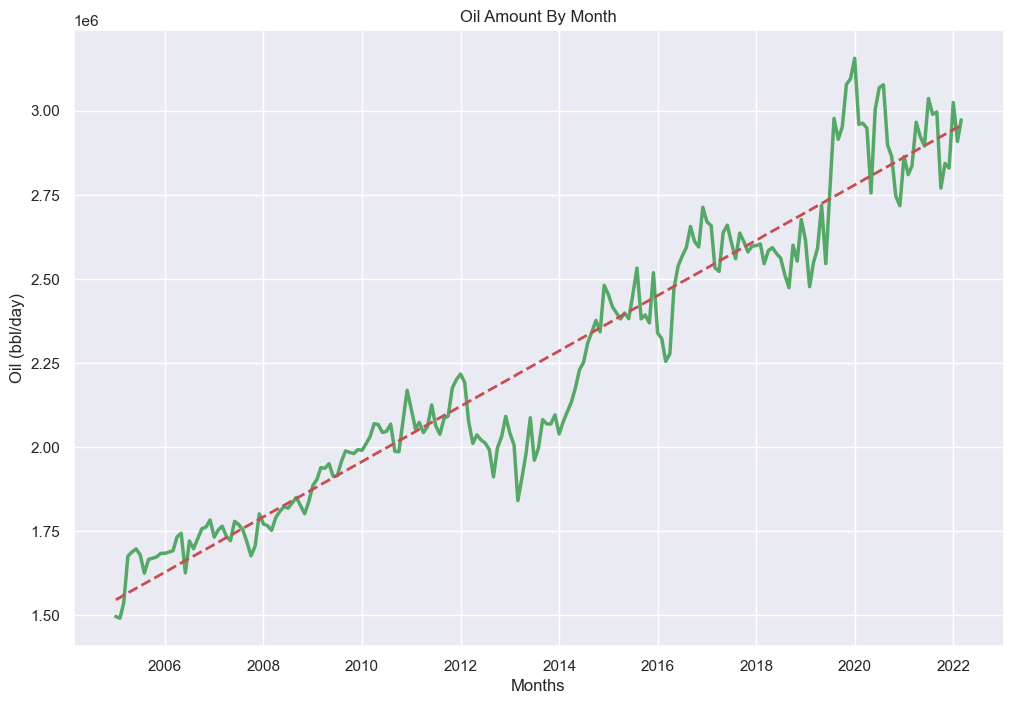

In [56]:
# Plot the trendline
sns.set(rc={'figure.figsize':(12,8)})
ax = sns.lineplot(x=df["Período"], y=df["Óleo (bbl/dia)"],markers=True,linewidth=2.5, color="g")
ax.set(title='Oil Amount By Month', xlabel='Months', ylabel="Oil (bbl/day)",)
ax = sns.lineplot(x=df["Período"], y=df["Trendline"], linewidth=2, color="r",linestyle='--')
plt.show()

In [57]:
# Make a non-stationary series to stationary
df['Detrended Value'] = df["Óleo (bbl/dia)"] - df['Trendline']

In [58]:
# Represent year as target mean
targetmean = {}
for year in df["Year"].unique():
    targetmean[year] = df[df["Year"] == year]["Detrended Value"].mean()
df["Year"] = df["Year"].map(targetmean)

print(df)

       Período  Óleo (bbl/dia)          Year     Trendline  Detrended Value
0   2005-01-01    1.495900e+06  48391.924983  1.545599e+06    -49698.825466
1   2005-02-01    1.490794e+06  48391.924983  1.552453e+06    -61659.011391
2   2005-03-01    1.536851e+06  48391.924983  1.559307e+06    -22456.716015
3   2005-04-01    1.675473e+06  48391.924983  1.566161e+06    109311.978761
4   2005-05-01    1.687871e+06  48391.924983  1.573016e+06    114855.559736
..         ...             ...           ...           ...              ...
202 2021-11-01    2.843323e+06  -2564.428956  2.930139e+06    -86815.839390
203 2021-12-01    2.829640e+06  -2564.428956  2.936993e+06   -107352.697715
204 2022-01-01    3.024642e+06  18156.967803  2.943847e+06     80794.664461
205 2022-02-01    2.908821e+06  18156.967803  2.950701e+06    -41880.340963
206 2022-03-01    2.973112e+06  18156.967803  2.957555e+06     15556.579912

[207 rows x 5 columns]


In [59]:
# Add Moving Average and LAG

df["Lag_1"] = df['Detrended Value'].shift(1)
df["Lag_2"] = df['Detrended Value'].shift(2)
df["Lag_3"] = df['Detrended Value'].shift(3)
df["Lag_4"] = df['Detrended Value'].shift(4)
df['MA_3'] = df['Detrended Value'].rolling(3, closed = 'left').mean()
df['MA_5'] = df['Detrended Value'].rolling(5, closed = 'left').mean()

In [60]:
# Clean NAN values
df = df.dropna()

In [61]:
# Reset index
df = df.reset_index()
del df["index"]
del df["Período"]
del df["Óleo (bbl/dia)"]

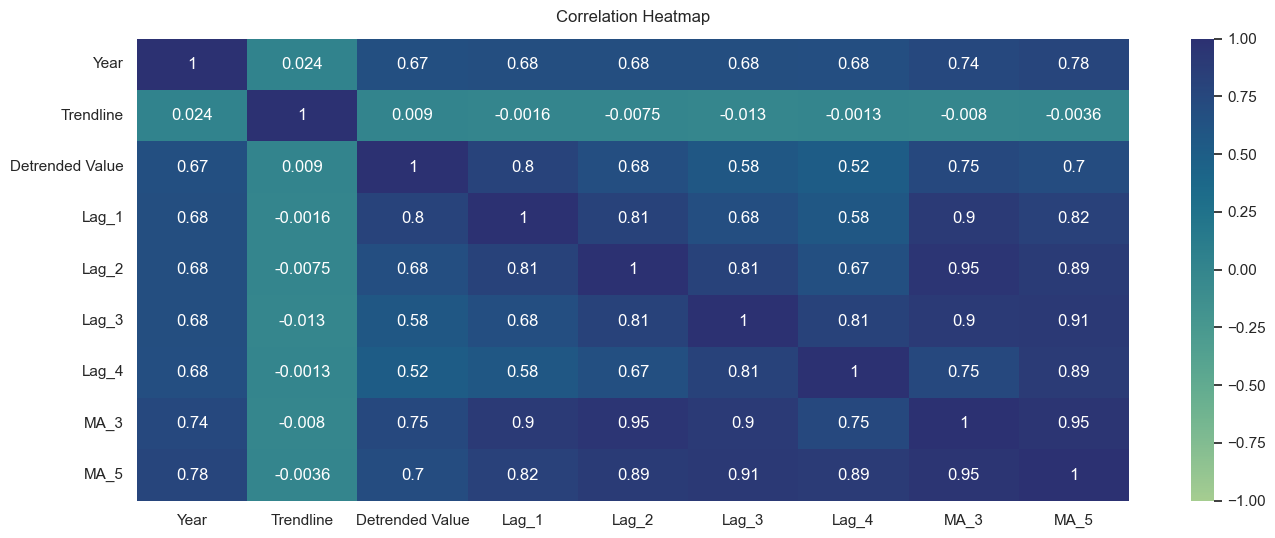

In [62]:
# Visualize the correlations
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="crest")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

In [63]:
# TRAIN / TEST split
train = df[:150]
test = df[150:]

train_y = train['Detrended Value']
train_x = train.drop(columns=['Detrended Value', "Trendline"])
test_y = test['Detrended Value']
test_trend = test["Trendline"]
test_x = test.drop(columns=['Detrended Value',"Trendline"])

In [64]:
# Train the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x, train_y)

In [65]:
# Test the model
print("SCORE", reg.score(test_x, test_y))

SCORE 0.5093577774122726


In [66]:
# Evaluate the model
test_x['pred'] = reg.predict(test_x) + test_trend
test_x['real'] = test_y + test_trend

In [67]:
print(test_x[["pred","real"]])

             pred          real
150  2.597197e+06  2.597381e+06
151  2.582723e+06  2.599041e+06
152  2.579131e+06  2.603949e+06
153  2.581810e+06  2.544966e+06
154  2.547087e+06  2.584107e+06
155  2.579554e+06  2.593044e+06
156  2.591807e+06  2.575219e+06
157  2.570242e+06  2.561906e+06
158  2.573467e+06  2.512398e+06
159  2.541658e+06  2.473794e+06
160  2.518487e+06  2.600333e+06
161  2.617077e+06  2.552700e+06
162  2.576557e+06  2.676506e+06
163  2.705580e+06  2.616756e+06
164  2.681371e+06  2.476739e+06
165  2.562166e+06  2.547357e+06
166  2.647948e+06  2.591660e+06
167  2.672569e+06  2.718847e+06
168  2.743452e+06  2.545486e+06
169  2.631860e+06  2.762368e+06
170  2.787291e+06  2.977237e+06
171  2.955647e+06  2.915391e+06
172  2.850572e+06  2.952200e+06
173  2.905043e+06  3.078753e+06
174  3.009736e+06  3.095065e+06
175  3.018362e+06  3.156255e+06
176  3.061653e+06  2.959920e+06
177  2.933344e+06  2.962960e+06
178  2.937128e+06  2.948310e+06
179  2.952884e+06  2.755498e+06
180  2.7

In [68]:
# Check the CORRELATIONS and MAPE for evaluate the model
from sklearn.metrics import mean_absolute_percentage_error
print("CORRELATIONS: ", test_x["pred"].corr(test_x["real"]))
print("MAPE:", mean_absolute_percentage_error(test_x['real'], test_x['pred']))

CORRELATIONS:  0.8546307477051005
MAPE: 0.02848215394064725


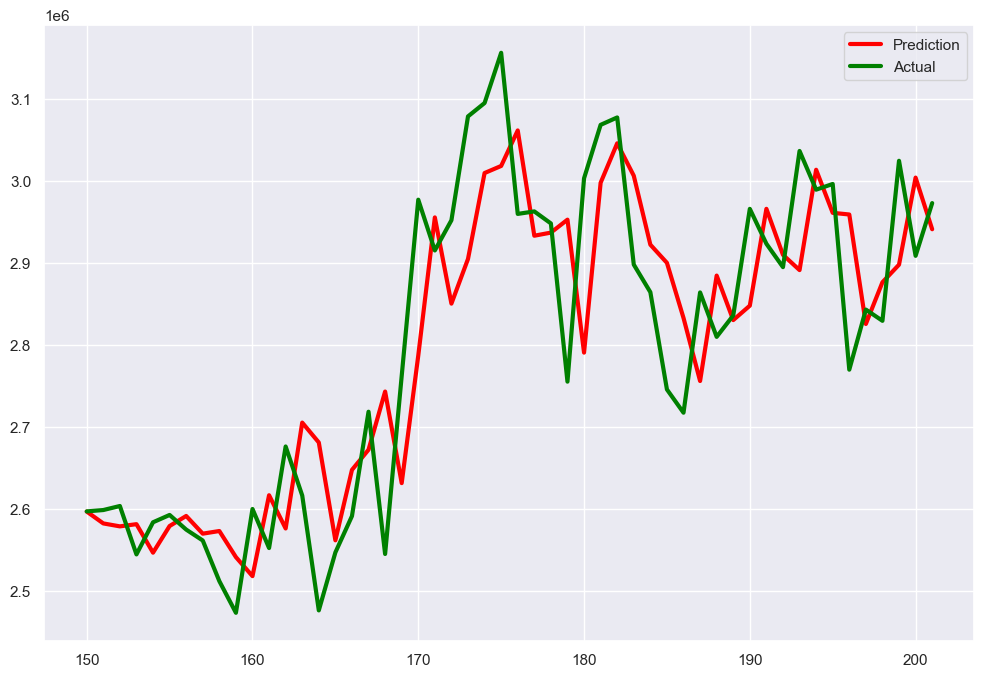

In [69]:
plt.plot(test_x['pred'], label="Prediction", color='red', linewidth=3)
plt.plot(test_x['real'], label="Actual", color='green', linewidth=3)
plt.legend()
plt.show()